In [223]:
import time
import numpy as np
import pyaudio 
import matplotlib.pyplot as plt
import threading

class AudioStimulus():
    def __init__(self, base_fr = 40.0, stim_fr = 0.75, stim_len = 6.68, bitrate = 48000):
        self.PyAudio = pyaudio.PyAudio
        self.bitrate = bitrate
        self.isActive = False
        self.base_fr = base_fr
        self.stim_fr = stim_fr
        self.stim_len = stim_len # second
        
    def generate_waveform(self,):
        sound_len = self.stim_len # second
        waveform = np.ndarray((int(sound_len * self.bitrate)), dtype=np.float32)
        
        f1 = self.base_fr
        f2 = self.base_fr + self.stim_fr   

        # generate waveform
        for i in range(len(waveform)):
            frac = 1 + i / len(waveform)
            waveform[i] = np.sin(f1 * i / self.bitrate * 2 * np.pi) + np.sin(f2 * i / self.bitrate * 2 * np.pi + np.pi) 
        waveform /= np.max(waveform) # normalize    
        return waveform

    def play_audio(self,waveform):
        p = self.PyAudio()
        stream = p.open(format = pyaudio.paFloat32, 
                        channels = 1, 
                        rate = int(self.bitrate), 
                        output = True)
        # start loop that generates audio
        while self.isActive:
            print("Play stimulus.")
            stream.write(waveform, num_frames = len(waveform))
            time.sleep(0.5)
        self.isActive = False
        stream.stop_stream()
        stream.close()
        p.terminate()
        print"Stimulus stopped.")
    
    def start_stimulus(self):
        self.isActive = True
        # kick off a thread that loops
        x = threading.Thread()
        x = threading.Thread(target=self.play_audio, args=(self.generate_waveform(),))
        x.start()

    def stop_stimulus(self):
        self.isActive = False
        print("Stop stimulus ...")
    
    def plot_stimulus(self):
        plt.plot(self.generate_waveform()[:], c='k')
        plt.show()

In [224]:
audiostim = AudioStimulus()

In [225]:
audiostim.start_stimulus()

Play stimulus.


In [226]:
audiostim.stop_stimulus()

Stop stimulus...
... stopped.


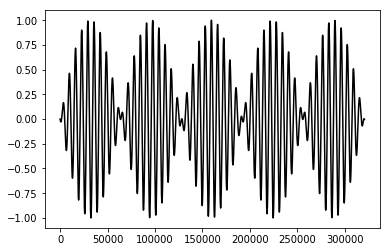

In [227]:
# Low base frequency for visualisation
audiostim = AudioStimulus(base_fr=7)
audiostim.plot_stimulus()

In [131]:
# linear cutoff at beginning and end (not used)
linear_increase = np.linspace(0, 1, bitrate * 1)
linear_decrease = np.linspace(1, 0, bitrate * 1)
#waveform[:len(linear_increase) ] *= linear_increase
#waveform[-len(linear_decrease):] *= linear_decrease